# sklearn中的方法

In [1]:
#加载数据库鸢尾花
from sklearn.datasets import load_iris
dataset=load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [2]:
#导入数据
import pandas as pd
x=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
y=pd.DataFrame(dataset["target"],columns=["target"])
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     target
0         0
1         0
2   

In [3]:
#创建决策树模型
from sklearn.tree import DecisionTreeClassifier
import numpy as np
#四部曲
#1、初始化模型
model=DecisionTreeClassifier()
#2、数据导入训练
classifer=model.fit(x,y)
#预测
classifer.predict([[5.6,2.5,4.9,3.1]])

array([2])

### 模型优化，训练集拆分

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=DecisionTreeClassifier()
classifer=model.fit(x_train,y_train)
y_predict=classifer.predict(x_test)
result=y_predict==y_test["target"]
right_rate=result.sum()/len(result)
print(right_rate)    #正确率非常不稳定，依赖于数据集的拆分，不同的拆封得到的正确率不一样，这个还可以进一步优化

1.0


### 决策树可视化

[Text(133.92000000000002, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 35, 36]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[2] <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 35, 36]'),
 Text(66.96000000000001, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(234.36, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(200.88000000000002, 54.

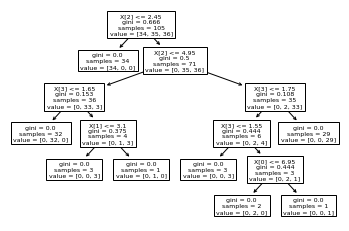

In [5]:
#加载tree，使用plot_tree函数
from sklearn import tree
tree.plot_tree(classifer)

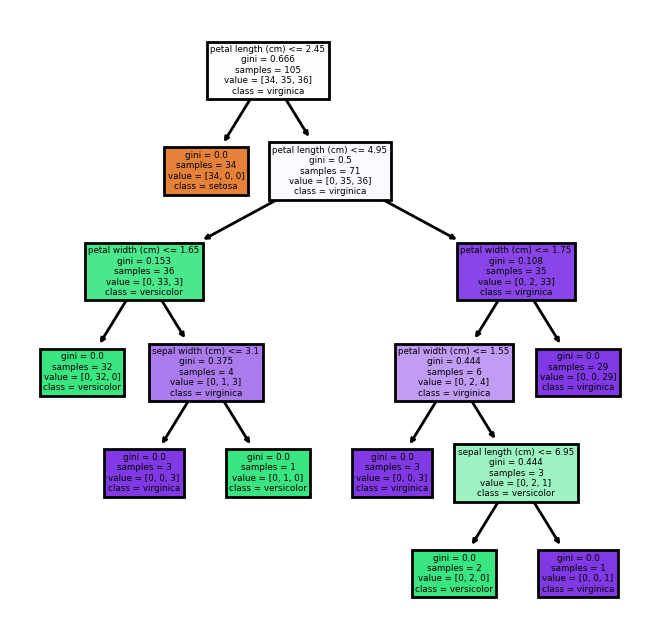

In [6]:
#通过参数设置优化上面决策树的显示
from matplotlib import pyplot as plt
f_names=dataset.feature_names
c_names=dataset.target_names
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=200)              #subplot返回一个包含figure和axes对象的元组，因此使用fig,ax = plt.subplots()将元组分解为fig和ax两个变量。
tree.plot_tree(classifer,feature_names=f_names,class_names=c_names,filled=True)     #filled参数标记颜色
#保存
fig.savefig("/content/drive/MyDrive/数据可视化/决策树可视化-sklearn.tree&Graphviz/decision_tree_visualization")
###
# gini-基尼系数、信息熵

In [7]:
#特征重要性，分类器的.feature_importances_方法
classifer.feature_importances_

array([0.0190528 , 0.0214344 , 0.86751497, 0.09199782])

### 优化：决策树剪枝

In [8]:
##好累，明天再说

In [9]:
#https://blog.csdn.net/yxc9681/article/details/88285061 参考资料

# Graphviz方法

In [ ]:
##太复杂了，暂时放弃